## Предобработка

In [1]:
import numpy as np

X = np.array([29.0, 32.0, 55.0, 48.0, 37.5, 33.0, 40.5, 54.0, 38.5, 42.0])
Y = np.array([79, 280, 71, 125, 176, 174, 210, 25, 175, 335])
x_y = list(zip(X, Y))
x_y.sort()
X = []
Y = []
for i, j in x_y:
    X.append(i)
    Y.append(j)

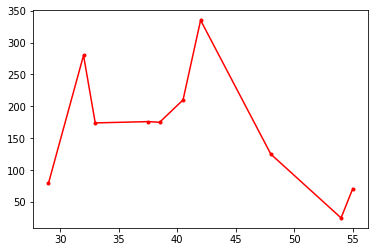

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, Y, '.r', linestyle='-')
plt.show()

## Восстановление регрессии функцией вида $y=a+bx$:
$b = \frac{\frac{\Sigma y_i x_i}{n} - \overline{y}\overline{x}}{\sigma_x^2};$
$a = \overline{y} - b \overline{x}$, где
$\sigma_x^2 = \sqrt{\frac{\Sigma(x_i-\overline{x})^2}{n}}$; $n$ - число элементов исходной выборки;
$\overline{y}, \overline{x}$ - средние значения

167.67103687726734 -0.06522678576965443


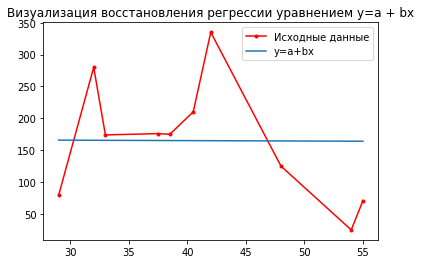

In [3]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)
sigma = sum(list(map(lambda x: (x - X_mean)**2, X))) / len(X)

### получим параметры уравнения

sum_x_y = 0
for x, y in zip(X, Y):
    sum_x_y += x * y

b = (sum_x_y / len(X) - X_mean * Y_mean) / sigma**2
a = Y_mean - b * X_mean

def regression(x):
    return a + b * x

Y_regression = list(map(lambda x: regression(x), X))
plt.plot(X, Y, '.r', linestyle='-', label='Исходные данные')
plt.plot(X, Y_regression, label='y=a+bx')
plt.title('Визуализация восстановления регрессии уравнением y=a + bx')
plt.legend()
print(a, b)
plt.show()

### Индекс корреляции (общая формула):
$R=\sqrt{1-\frac{\Sigma (y_i-y(x))^2}{\Sigma (y_i-\overline{y})^2}}$

In [4]:
### Индекс корреляции
from math import sqrt

yi_yxi = 0
y_ymean = 0
for x, y in zip(X, Y):
    yi_yxi += (y - regression(x)) ** 2
    y_ymean += (y - Y_mean) ** 2

R_regression = sqrt(1 - yi_yxi / y_ymean)
print('Индекс корреляции линейной регрессии: ', R_regression)

Индекс корреляции линейной регрессии:  0.07341875689592554


### Выводы по линейной регрессии:
Как видно из коэффициентов уравнения регрессии ($a=167,671; b=-0,065$) увеличение зависимой переменной практически никак не влияет на цену и предсказанные значения в данных пределах практически равны среднему значению искомого ряда целевой переменной ($Y_{mean}=165$). Это говорит о том что использование восстановление регрессии с помощью линейного уравнения не дает возможности с адекватной точностью предсказать значение целевой переменной, что подтверждает индекс корреляции ($R=0,073$).

## Восстановление регрессии функцией вида $y=a+bx+cx^2$:
$a=\frac{1}{D}(\Sigma y \Sigma (x_i - \overline{x})^4 - \Sigma (x_i - \overline{x})^2 \Sigma y_i(x_i - \overline{x})^2);\quad
b=\frac{\Sigma (x_i - \overline{x})y_i}{\Sigma (x_i - \overline{x})^2}; \quad c=\frac{1}{D}(n\Sigma (x_i-\overline{x})^2y_i - \Sigma (x_i - \overline{x})^2\Sigma y); \quad D=n \Sigma (x_i-\overline{x})^4 - (\Sigma(x_i-\overline{x})^2)^2$
Для корректной аппроксимации из за того что мы не проводим центрирование функции относительно оси координат, сохраняя исходное смещение, из каждого $x$ полученного уравнения необходимо будет вычесть среднее значение ряда $X$

233.3185356578294 -4.714102874537348 -0.9452908873752726


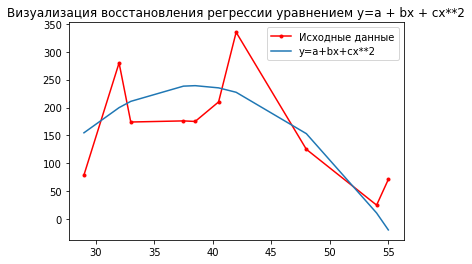

In [5]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)
xi_xmean_4 = sum(map(lambda x: (x - X_mean)**4, X))
xi_xmean_2 = sum(map(lambda x: (x - X_mean)**2, X))
y_xi_xmean_2 = sum(map(lambda x: x[1] * (x[0] - X_mean)**2, zip(X, Y)))
y_xi_xmean = sum(map(lambda x: x[1] * (x[0] - X_mean), zip(X, Y)))
Determinant = len(X) * xi_xmean_4 - (xi_xmean_2) ** 2
a = (sum(Y) * xi_xmean_4 - xi_xmean_2 * y_xi_xmean_2) / Determinant
b = y_xi_xmean / xi_xmean_2
c = (len(X) * y_xi_xmean_2 - xi_xmean_2 * sum(Y)) / Determinant

def quadratic_function(x):
    return a + b * (x - X_mean) + c * (x - X_mean)**2

Y_quadratic = list(map(lambda x: quadratic_function(x), X))
plt.plot(X, Y, '.r', linestyle='-', label='Исходные данные')
plt.plot(X, Y_quadratic, label='y=a+bx+cx**2')
plt.title('Визуализация восстановления регрессии уравнением y=a + bx + cx**2')
plt.legend()
print(a, b, c)
plt.show()

In [6]:
### Индекс корреляции
from math import sqrt

yi_yxi = 0
y_ymean = 0
for x, y in zip(X, Y):
    yi_yxi += (y - quadratic_function(x)) ** 2
    y_ymean += (y - Y_mean) ** 2

R_regression = sqrt(1 - yi_yxi / y_ymean)
print('Индекс корреляции квадратичной регрессии: ', R_regression)

Индекс корреляции квадратичной регрессии:  0.6895257750822315


### Выводы по квадратичной регрессии:
Полученная модель достаточно хорошо описывает исходные данные, что подтверждает коэффициент корреляции $R=0,689$. Такой результат достаточно предсказуем для выбранной модели, поскольку некоторые участки напоминают поведение квадратичной функции.

### Восстановление регрессии функцией вида $y=a+\frac{b}{x}$:
$b=\frac{\frac{\Sigma y_i z_i}{n} - \overline{z}\overline{y}}{\sigma_x^2}'\quad a = \overline{y} - b \overline{z}$, где $\sigma_x^2 = \sqrt{\frac{\Sigma(x_i-\overline{x})^2}{n}}$; $n$ - число элементов исходной выборки; $z=\frac{1}{x}$;
$\overline{y}, \overline{z}$ - средние значения$

23.488987341648397 5555.747261964027


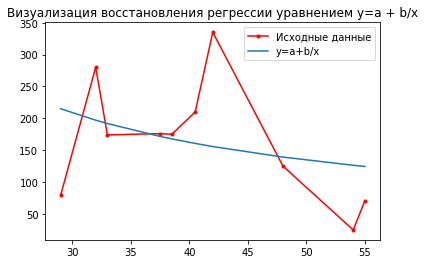

In [7]:
Z = list(map(lambda x: 1/x, X))
Z_mean = np.mean(Z)
sigma_z = sum(list(map(lambda x: (x - Z_mean)**2, Z))) / len(Z)
y_z = sum(map(lambda x: x[0] * x[1], zip(Z, Y)))
b = (y_z / len(Z) - Y_mean * Z_mean) / sigma_z
a = Y_mean - b * Z_mean

def hyperbolic_function(x):
    return a + b / x

Y_hyperbola = list(map(lambda x: hyperbolic_function(x), X))
plt.plot(X, Y, '.r', linestyle='-', label='Исходные данные')
plt.plot(X, Y_hyperbola, label='y=a+b/x')
plt.title('Визуализация восстановления регрессии уравнением y=a + b/x')
plt.legend()
print(a, b)
plt.show()

In [8]:
### Индекс корреляции
from math import sqrt

yi_yxi = 0
y_ymean = 0
for x, y in zip(X, Y):
    yi_yxi += (y - hyperbolic_function(x)) ** 2
    y_ymean += (y - Y_mean) ** 2

R_regression = sqrt(1 - yi_yxi / y_ymean)
print('Индекс корреляции гиперболической регрессии: ', R_regression)

Индекс корреляции гиперболической регрессии:  0.316644355862313


### Выводы по гиперболической регрессии:
Полученные коэффициенты вносят примерно одинаковый вклад в значение целевой переменной. Полученная модель своим поведением на локальном отрезке напоминает прямую и ее предсказательная способность обладает слабой гибкостью, что подтверждает коэффициент корреляции ($R=0,316$).